# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Loading and Inspecting Data

In [2]:
df = pd.read_csv(r"train.csv")

In [3]:
pd.concat([df.head(), df.tail()])

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
for col in df.columns:
    print(col, '\n', df[col].unique(), 
    '\n', '-'*25)

Unnamed: 0 
 [     0      1      2 ... 103901 103902 103903] 
 -------------------------
id 
 [ 70172   5047 110028 ...  68825  54173  62567] 
 -------------------------
Gender 
 ['Male' 'Female'] 
 -------------------------
Customer Type 
 ['Loyal Customer' 'disloyal Customer'] 
 -------------------------
Age 
 [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78] 
 -------------------------
Type of Travel 
 ['Personal Travel' 'Business travel'] 
 -------------------------
Class 
 ['Eco Plus' 'Business' 'Eco'] 
 -------------------------
Flight Distance 
 [ 460  235 1142 ...  974 1479  400] 
 -------------------------
Inflight wifi service 
 [3 2 4 1 5 0] 
 -------------------------
Departure/Arrival time convenient 
 [4 2 5 3 1 0] 
 -------------------------
Ease of Online booking 
 [3 2 5 4 1 0] 
 ------------

## Data Cleaning
- Drop unnecessary columns
- Handle null values

In [6]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [7]:
delayCol = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
for col in delayCol:
    df[col] = df[col].fillna(0)

## Encoding Data

In [8]:
satisfaction_map = {
    'neutral or dissatisfied' : 0,
    'satisfied' : 1
}

df['satisfaction'] = df['satisfaction'].map(satisfaction_map)

In [9]:
ordinal = OrdinalEncoder(cols=['Gender', 'Customer Type', 'Type of Travel', 'Class'])
df = ordinal.fit_transform(df)

## Exploring relations
- Finding relations between features and the target

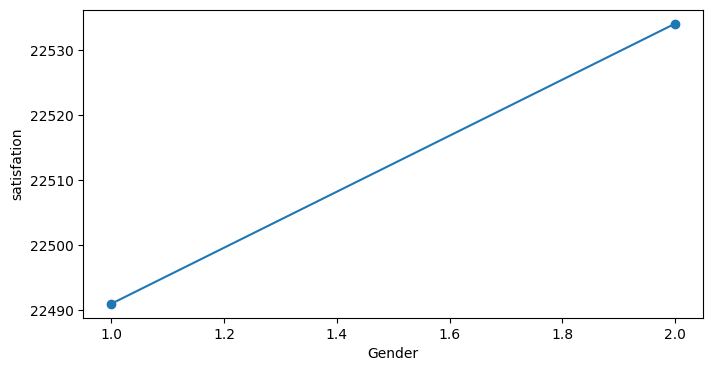

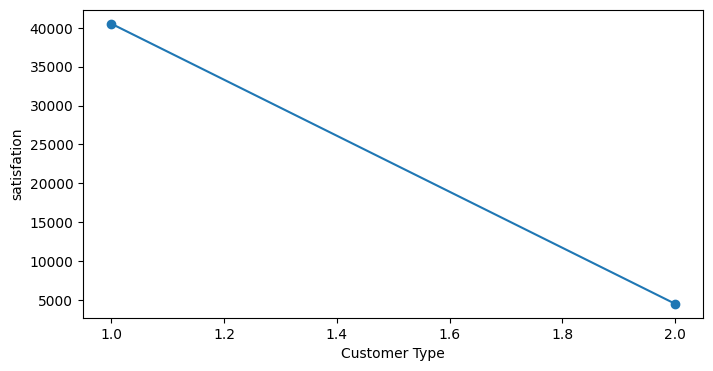

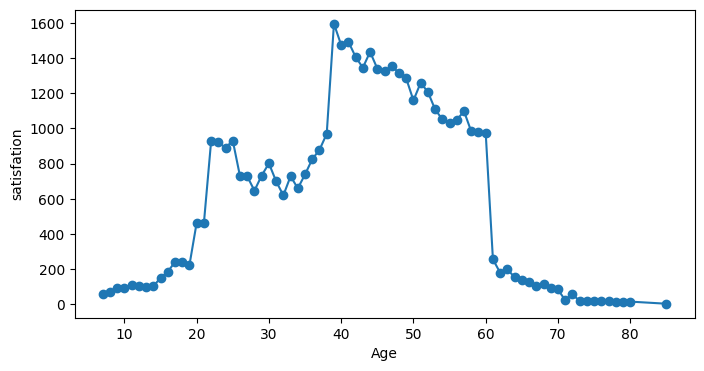

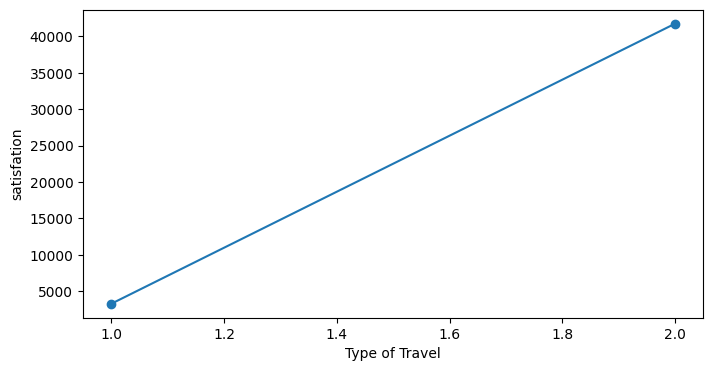

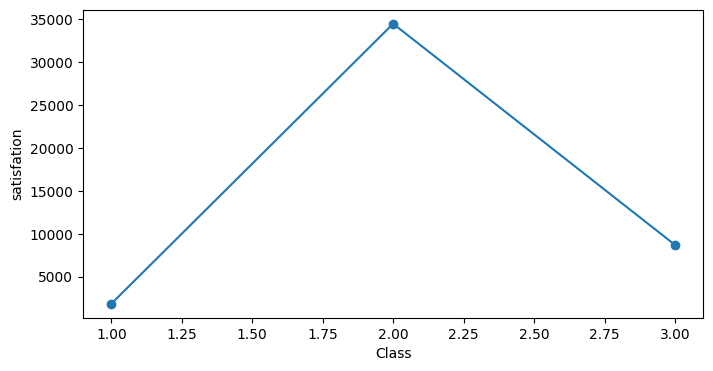

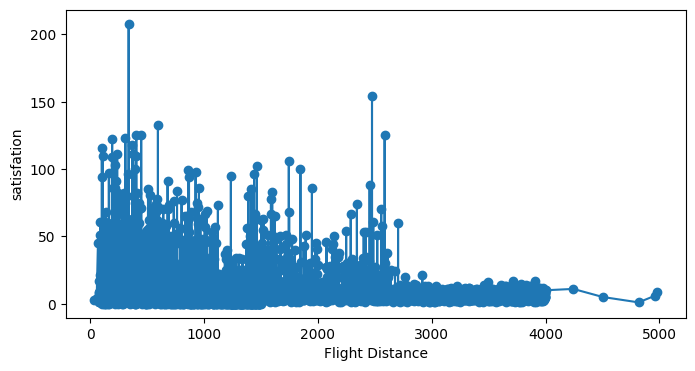

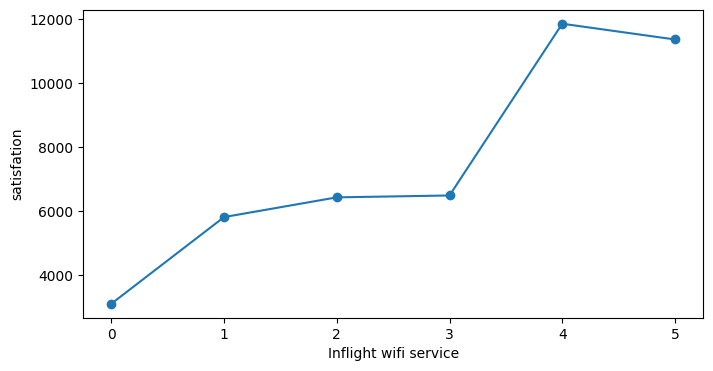

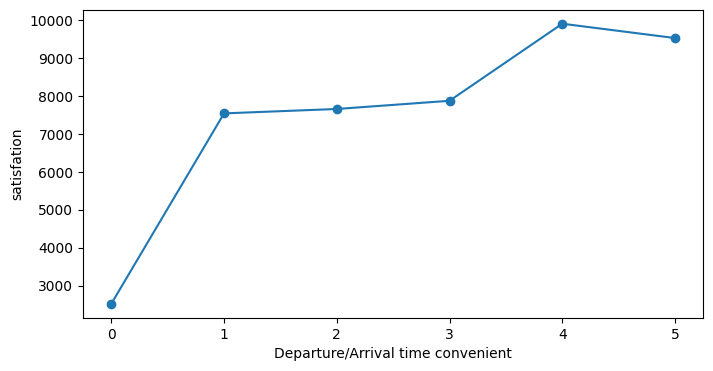

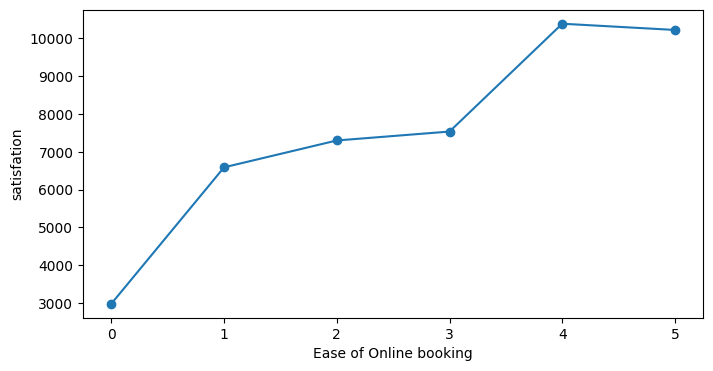

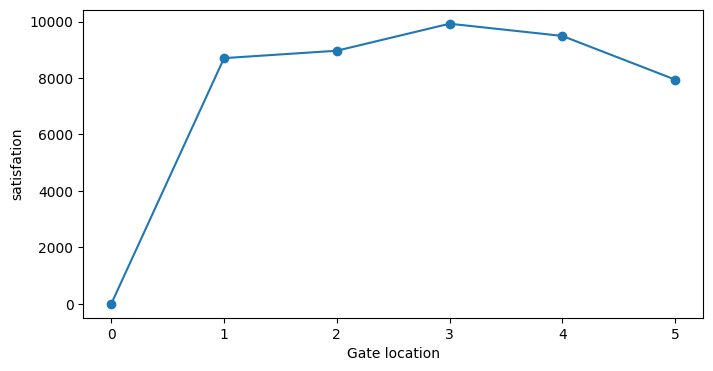

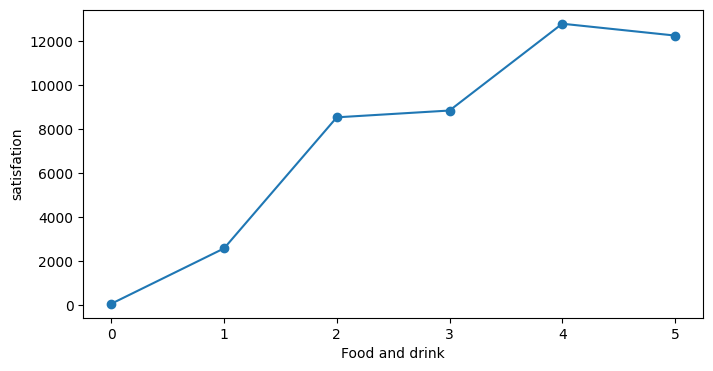

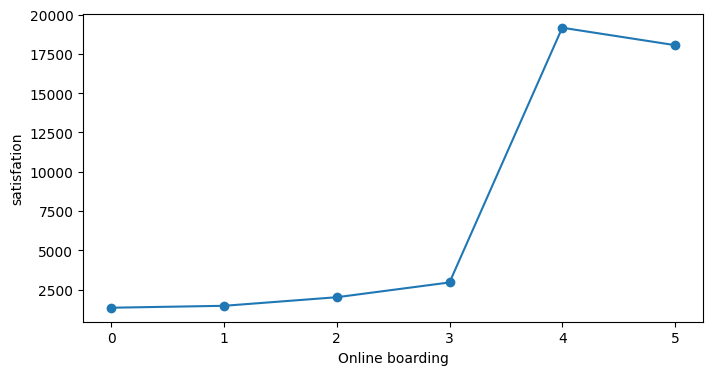

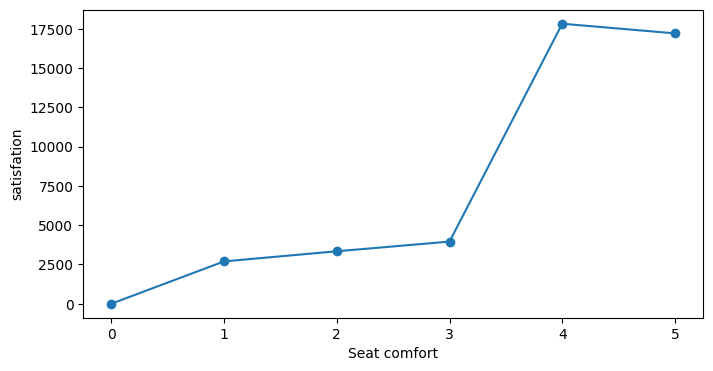

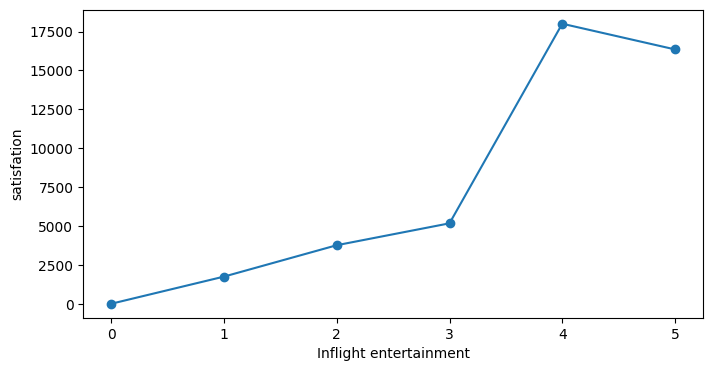

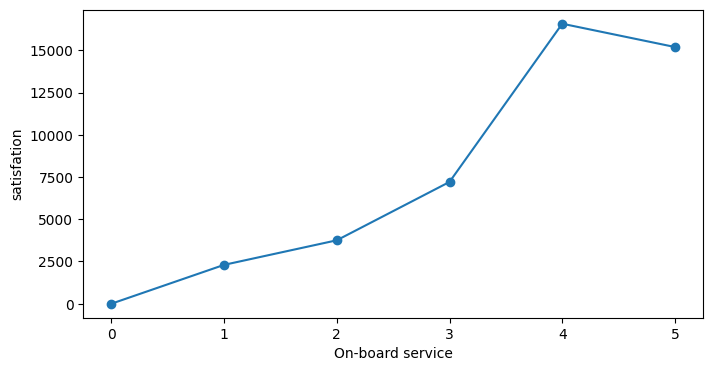

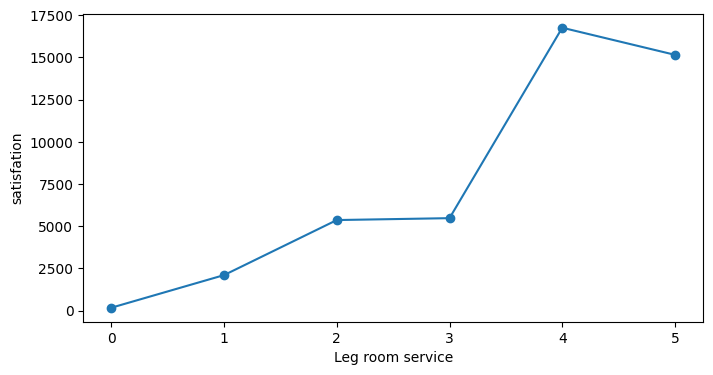

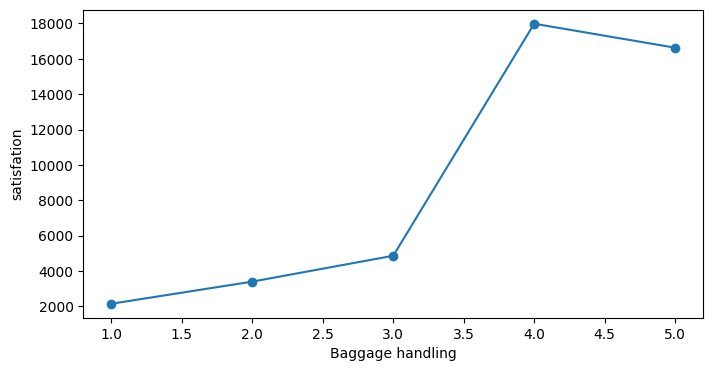

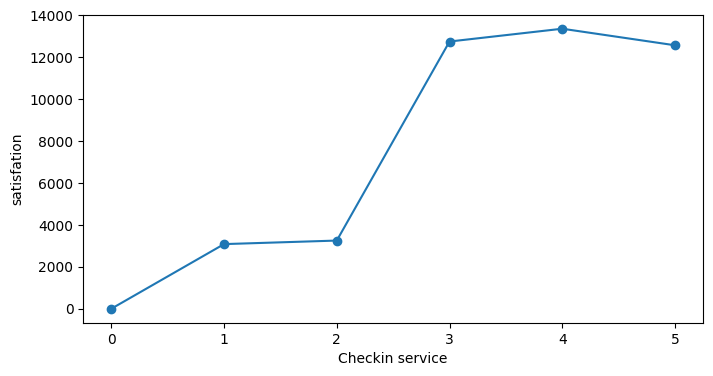

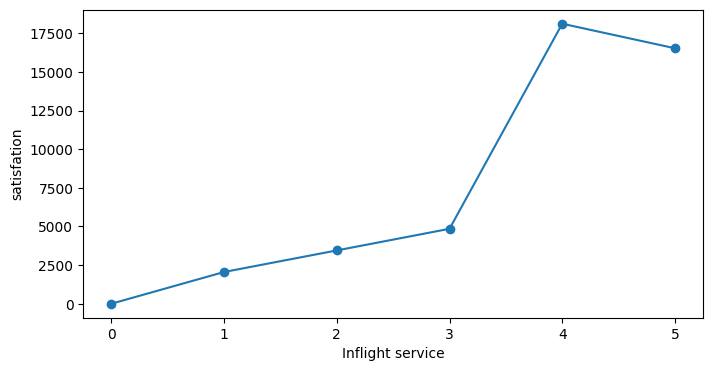

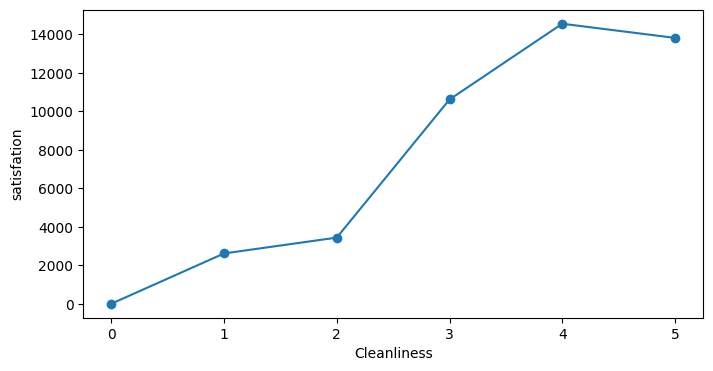

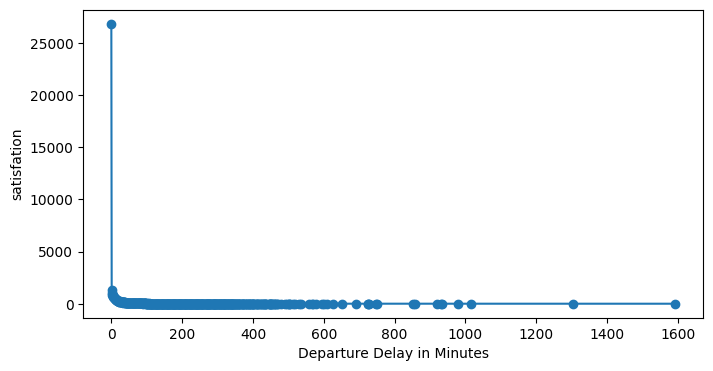

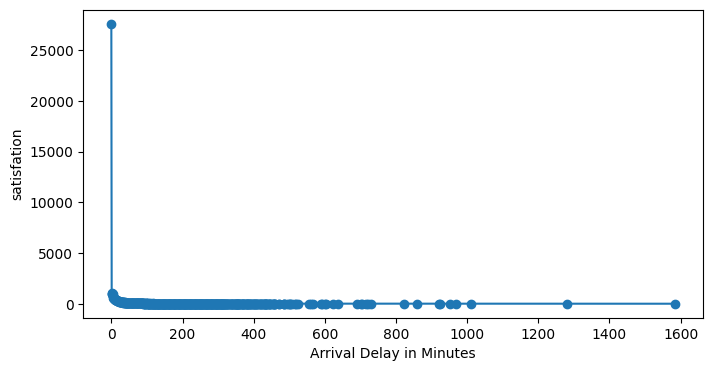

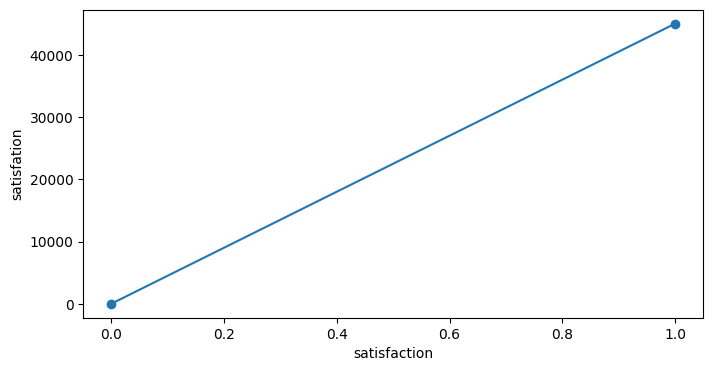

In [10]:
for col in df.columns:
    Price = df.groupby(df[col])['satisfaction'].sum()

    Price.plot(kind='line', figsize=(8,4), marker='o')
    plt.xlabel(col)
    plt.ylabel("satisfation")
    plt.show()

## Feature Engineering
- Creating new features that has high correlation with the target

In [11]:
df['Entertainment'] = df['Inflight wifi service'] + df['Food and drink'] + df['Seat comfort'] + df['Inflight entertainment']
df['Online_service'] = df['Ease of Online booking'] + df['Online boarding']
df['Service_quality'] = df['On-board service'] + df['Leg room service'] + df['Baggage handling'] + df['Checkin service'] + df['Inflight service'] + df['Cleanliness']
df['Total_service'] = df['Online_service'] + df['Service_quality']

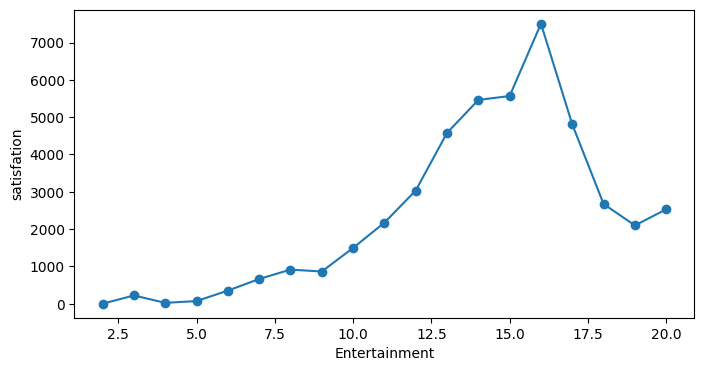

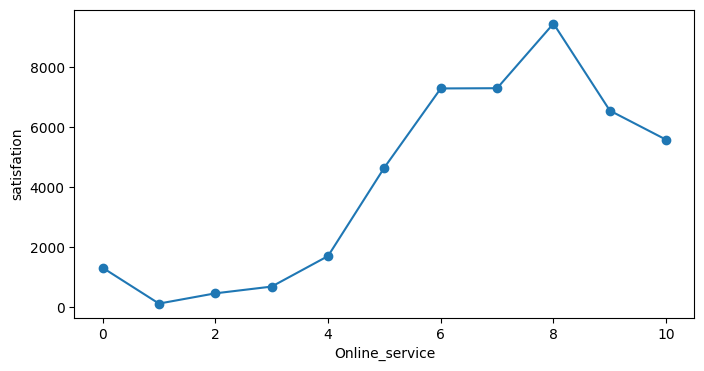

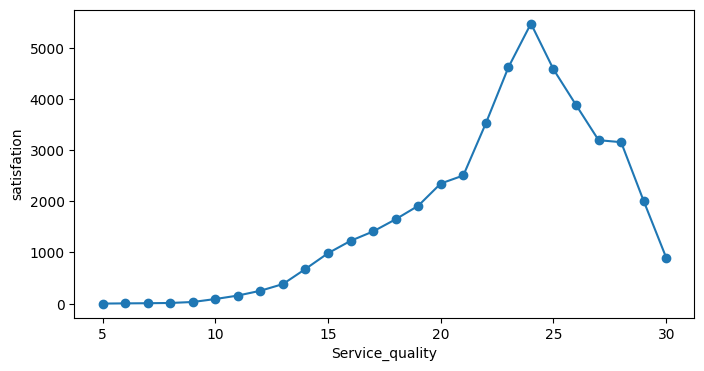

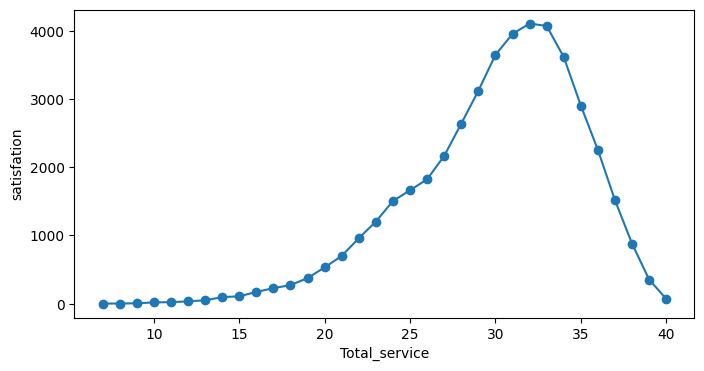

In [12]:
newFeatures = ['Entertainment', 'Online_service', 'Service_quality', 'Total_service']
for col in newFeatures:
    Price = df.groupby(df[col])['satisfaction'].sum()

    Price.plot(kind='line', figsize=(8,4), marker='o')
    plt.xlabel(col)
    plt.ylabel("satisfation")
    plt.show()

## Scaling the Data

In [13]:
minMax_1 = MinMaxScaler(feature_range=(0,5))
minMaxCols = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
df[minMaxCols] = minMax_1.fit_transform(df[minMaxCols])

df['Timing_crisis'] = df['Departure/Arrival time convenient']*(-1) - df['Departure Delay in Minutes'] - df['Arrival Delay in Minutes']

In [14]:
minMax_2 = MinMaxScaler(feature_range=(-1,2))
standard = StandardScaler()

minMaxCols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Timing_crisis']
standardCols = ['Age', 'Entertainment', 'Total_service', 'Service_quality', 'Online_service']

df[minMaxCols] = minMax_2.fit_transform(df[minMaxCols])
df[standardCols] = standard.fit_transform(df[standardCols])

## Train-Test split

In [15]:
x = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((83123, 27), (20781, 27), (83123,), (20781,))

In [17]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

## Feature Engineering
- using polynomial features to capture non-linear relations

In [18]:
poly = PolynomialFeatures(degree=2, include_bias=False)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

## Model training

In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

c:\Users\omarr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\omarr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [20]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

## Model Evaluation

In [21]:
print("Training confusion_matrix: ",'\n', confusion_matrix(y_train, y_train_predict))
print("\nTesting confusion_matrix: ", '\n', confusion_matrix(y_test, y_test_predict))

Training confusion_matrix:  
 [[45138  2028]
 [ 3050 32907]]

Testing confusion_matrix:  
 [[11233   480]
 [  761  8307]]


In [22]:
print("Training classification_report: ",'\n', classification_report(y_train, y_train_predict))
print("Testing classification_report: ",'\n', classification_report(y_test, y_test_predict))

Training classification_report:  
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     47166
           1       0.94      0.92      0.93     35957

    accuracy                           0.94     83123
   macro avg       0.94      0.94      0.94     83123
weighted avg       0.94      0.94      0.94     83123

Testing classification_report:  
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.95      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781

